In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from statsmodels.tsa.arima.model import ARIMA

In [441]:
df = pd.read_csv("data_new.csv")

In [442]:
df.head()

,Unnamed: 0,Age (Kyr ago),Rescaled MST (°C),BIT index,CO2 (ppmv),δ18O,GLT_syn,d18O_benthic
0,0,-0.04,23.43,0.51,350.85,-9.50,-35.79,3.23
1,1,0.08,23.38,0.65,286.50,-9.33,-35.79,3.23
2,2,0.14,22.91,0.48,284.01,-9.35,-35.79,3.23
3,3,0.31,23.31,0.61,276.72,-9.52,-35.79,3.23
4,4,0.41,23.80,0.59,283.73,-9.12,-35.79,3.23


In [443]:
# Selecting only the "Age (Kyr ago)" and "Rescaled MST (°C)" columns
rescaled_mst_df = df.iloc[:, [1, 2]]

print(rescaled_mst_df)

     Age (Kyr ago)  Rescaled MST (°C)
0            -0.04              23.43
1             0.08              23.38
2             0.14              22.91
3             0.31              23.31
4             0.41              23.80
..             ...                ...
368          73.91              23.65
369          74.13              23.28
370          74.28              23.30
371          74.50              22.77
372          74.70              22.38

[373 rows x 2 columns]


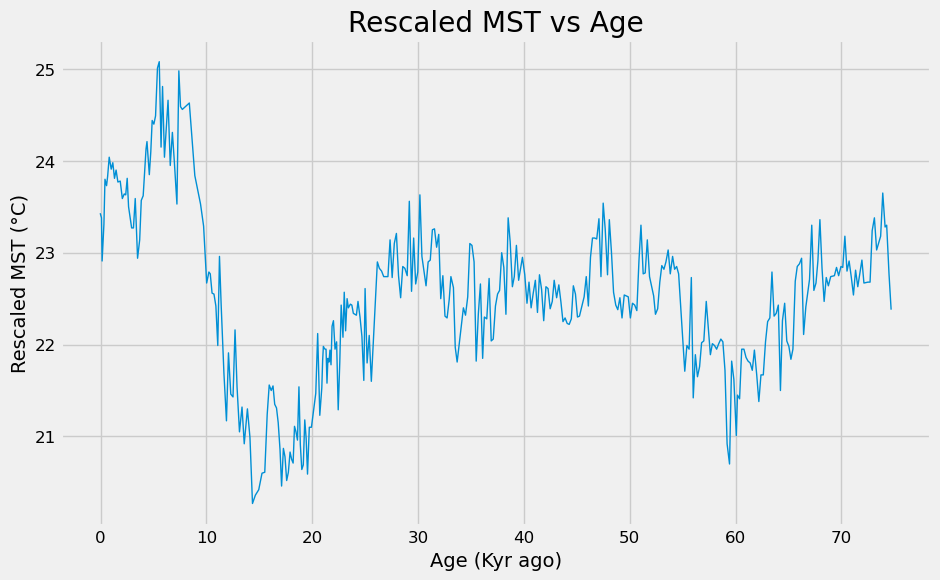

In [444]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(rescaled_mst_df.iloc[:, 0], rescaled_mst_df.iloc[:, 1], linewidth=1)
plt.title('Rescaled MST vs Age')
plt.xlabel('Age (Kyr ago)')
plt.ylabel('Rescaled MST (°C)')
plt.grid(True)
plt.show()

In [445]:
# Reverse the order of the DataFrame and reset index
rescaled_mst_df_reversed = rescaled_mst_df.iloc[::-1].reset_index(drop=True)

print(rescaled_mst_df_reversed)

     Age (Kyr ago)  Rescaled MST (°C)
0            74.70              22.38
1            74.50              22.77
2            74.28              23.30
3            74.13              23.28
4            73.91              23.65
..             ...                ...
368           0.41              23.80
369           0.31              23.31
370           0.14              22.91
371           0.08              23.38
372          -0.04              23.43

[373 rows x 2 columns]


In [446]:
# Find the maximum value in the "Age (Kyr ago)" column
max_age = rescaled_mst_df_reversed['Age (Kyr ago)'].max()

# Update the "Age (Kyr ago)" column values
rescaled_mst_df_reversed['Age (Kyr ago)'] = max_age - rescaled_mst_df_reversed['Age (Kyr ago)']

print(rescaled_mst_df_reversed)

     Age (Kyr ago)  Rescaled MST (°C)
0             0.00              22.38
1             0.20              22.77
2             0.42              23.30
3             0.57              23.28
4             0.79              23.65
..             ...                ...
368          74.29              23.80
369          74.39              23.31
370          74.56              22.91
371          74.62              23.38
372          74.74              23.43

[373 rows x 2 columns]


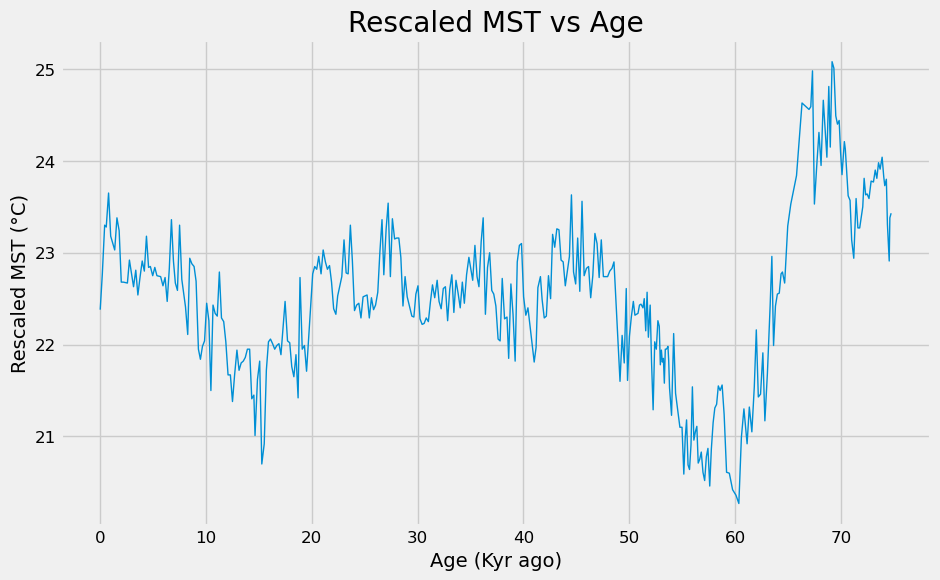

In [447]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(rescaled_mst_df_reversed.iloc[:, 0], rescaled_mst_df_reversed.iloc[:, 1], linewidth=1)
plt.title('Rescaled MST vs Age')
plt.xlabel('Age (Kyr ago)')
plt.ylabel('Rescaled MST (°C)')
plt.grid(True)
plt.show()

In [448]:
# Check the data type of the index
print(rescaled_mst_df_reversed.index.dtype)

int64


In [449]:
#start_date = pd.Timestamp('2000-01-01')
#rescaled_mst_df_reversed['Age'] = [(start_date + pd.DateOffset(years=i)).strftime('%Y-%m-%d') for i in rescaled_mst_df_reversed.index]
rescaled_mst_df_reversed = rescaled_mst_df_reversed.rename(columns={"Rescaled MST (°C)": "MST"})
rescaled_mst_df_reversed = rescaled_mst_df_reversed.rename(columns={"Age (Kyr ago)": "Age"})


# Print the updated DataFrame
print(rescaled_mst_df_reversed)

       Age    MST
0     0.00  22.38
1     0.20  22.77
2     0.42  23.30
3     0.57  23.28
4     0.79  23.65
..     ...    ...
368  74.29  23.80
369  74.39  23.31
370  74.56  22.91
371  74.62  23.38
372  74.74  23.43

[373 rows x 2 columns]


In [450]:
# Check the data type of the index
print(rescaled_mst_df_reversed.index.dtype)

int64


In [451]:
rescaled_mst_df_reversed

,Age,MST
0,0.00,22.38
1,0.20,22.77
2,0.42,23.30
3,0.57,23.28
4,0.79,23.65
...,...,...
368,74.29,23.80
369,74.39,23.31
370,74.56,22.91
371,74.62,23.38


#  Train test and validation splits

In [452]:
## Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

In [453]:
# Splitting the data into training and test sets

MST_train = rescaled_mst_df_reversed.iloc[:301]  # First 301 rows for training
MST_test = rescaled_mst_df_reversed.iloc[301:]   # Rest of the rows for testing

In [454]:
## n_splits is the number of splits, here we use 5
## test_size limits the size of the holdout set, here we'll imagine 
kfold = TimeSeriesSplit(n_splits = 5,
                           test_size = 30)   # forecast horizon

In [455]:
## Now we can use this just like a kfold object

for train_index, test_index in kfold.split(MST_train):
    print("TRAIN INDEX:", train_index)
    print("TEST INDEX:", test_index)
    print()
    print()

TRAIN INDEX: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150]
TEST INDEX: [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180]


TRAIN INDEX: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54

# A linear trend model

In [456]:
## import linear regression
from sklearn.linear_model import LinearRegression

In [457]:
## Make the model object
reg = LinearRegression()

## Fit the model
reg.fit(np.array(MST_train.index).reshape(-1,1),
        MST_train.MST)

## Make the forecast
trend_pred = reg.predict(np.array(MST_test.index).reshape(-1,1))

In [458]:
print(np.array(MST_test.index))

[301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336
 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354
 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372]


NameError: name 'Age' is not defined

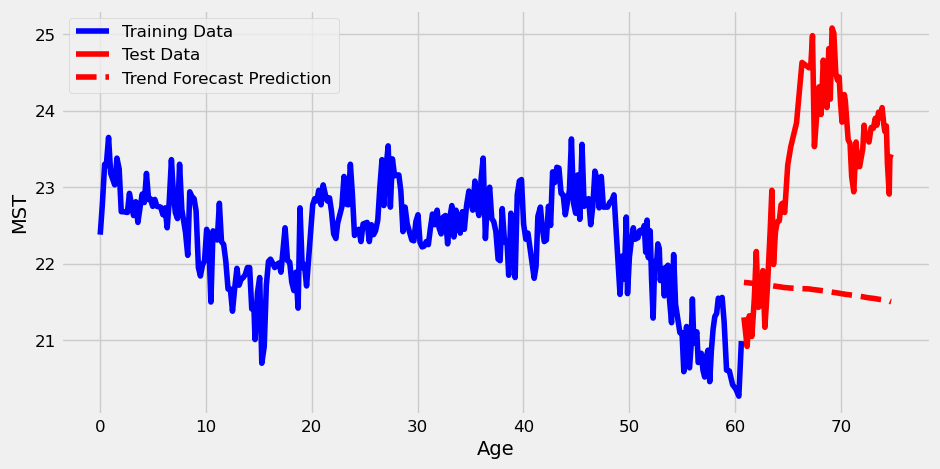

In [459]:
## Plotting the naive prediction with the actual data
plt.figure(figsize=(10,5))

plt.plot(MST_train.Age,
            MST_train.MST,
            'b-',
            label="Training Data")

plt.plot(MST_test.Age,
            MST_test.MST,
            'r-',
            label="Test Data")

plt.plot(MST_test.Age,
            trend_pred,
            'r--',
            label="Trend Forecast Prediction")

plt.xlabel("Age", fontsize=14)
plt.ylabel("MST", fontsize=14)

plt.legend(fontsize=12, loc=2)

plt.xticks(ticks=plt.xticks()[0][::len(Age) // 20])
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()

In [ ]:
y_train = MST_train.MST
y_train_pred = reg.predict(np.array(MST_train.index).reshape(-1,1))
residuals = y_train - y_train_pred

sigma = np.sqrt(((residuals)**2).sum()/len(residuals))

plt.plot(MST_test.Age,
            MST_test.MST,
            'r-',
            label="Test Data")

plt.plot(MST_test.Age,
            trend_pred,
            'k--',
            label="Trend Forecast Prediction")

for i in range(20):
    plt.plot(MST_test.Age,
            trend_pred + np.random.normal(0, sigma, size = (72,)),
            'k',
             linewidth=1,
            alpha = 0.1
            )

plt.plot(MST_test.Age,
            trend_pred + np.random.normal(0, sigma, size = (72,)),
            'b',
            alpha = 1,
         linewidth=2,
            label = 'Simulated linear model data'
            )

plt.xlabel("Age", fontsize=14)
plt.ylabel("MST", fontsize=14)



plt.legend(fontsize=8, loc=2)
plt.gcf().autofmt_xdate()


plt.show()